In [263]:
import numpy as np
import matplotlib.pyplot as plt

The Regression Class

In [264]:
class PolynomialRegression1D:
    degree = 2
    w = None
    def __init__(self, degree):
        self.degree = degree
    
    def fit(self, X, y):
        DTrain = np.zeros((len(X), self.degree))
        for i in range(len(X)):
            for j in range(self.degree):
                DTrain[i][j] = X[i]**j
                
        DTransposeTrain = np.transpose(DTrain)
        A = np.matmul(DTransposeTrain, DTrain)
        AInverse = np.linalg.inv(A)

        r = np.zeros((len(y), 1))
        for i in range(len(y)):
            r[i] = y[i]
        
        B = np.matmul(DTransposeTrain, r)
        self.w = np.matmul(AInverse, B)
        return self.w

    def predict(self, X):
        y = np.zeros(len(X))
        DTest = np.zeros((len(X), self.degree))
        for i in range(len(X)):
            for j in range(self.degree):
                DTest[i][j] = X[i]**j
        DTransposeTest = np.transpose(DTest)
        A = np.matmul(DTransposeTest, DTest)
        r = np.matmul(DTest, self.w)
        return r

Setting up Synthetic data (since california housing has incredible variance for 1D data)

In [265]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

np.random.seed(42)
X = np.random.rand(100, 1)
y = 4 + 3 * X + 8 * X**2 + 6 * X**3 + np.random.randn(100, 1)

XTrain, XTest, yTrain, yTest = train_test_split(X, y)

scaler = StandardScaler()
XTrain =XTrain.reshape(-1, 1)
XTest = XTest.reshape(-1, 1)
XTrain = scaler.fit_transform(XTrain)
XTest = scaler.transform(XTest)

Relative Squared Error:  0.13417916635364321
Root Mean Squared Error:  1.938792060426828


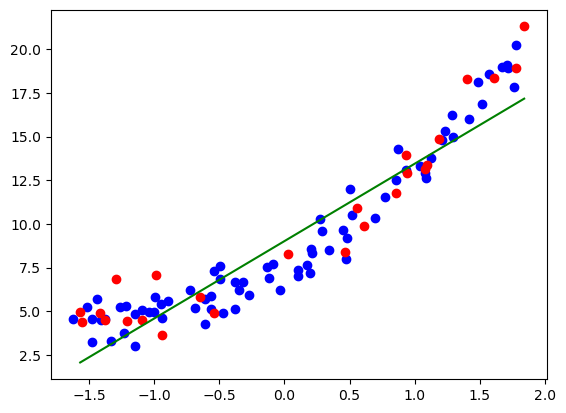

In [271]:
pr = PolynomialRegression1D(2)
pr.fit(XTrain, yTrain)
y_pred = pr.predict(XTest)

# Plot
plt.scatter(XTrain, yTrain, color='blue', label='train')
plt.scatter(XTest, yTest, color='red', label='test')

# Sort values for plotting
XTestPlot, y_predPlot = zip(*sorted(zip(XTest, y_pred)))
plt.plot(XTestPlot, y_predPlot, color='green', label='prediction')
#plt.plot(XTest, y_pred, color='green', label='prediction')

def evaluateRSE(y_pred, y_true):
    #Relative squared error
    RSE = np.sum((y_pred - y_true)**2) / np.sum((y_true - np.mean(y_true))**2)
    return RSE

def evaluateMSE(y_pred, y_true):
    #Mean squared error
    RMSE = np.sqrt(np.mean((y_pred - y_true)**2))
    return RMSE

print('Relative Squared Error: ', evaluateRSE(y_pred, yTest))
print('Root Mean Squared Error: ', evaluateMSE(y_pred, yTest))


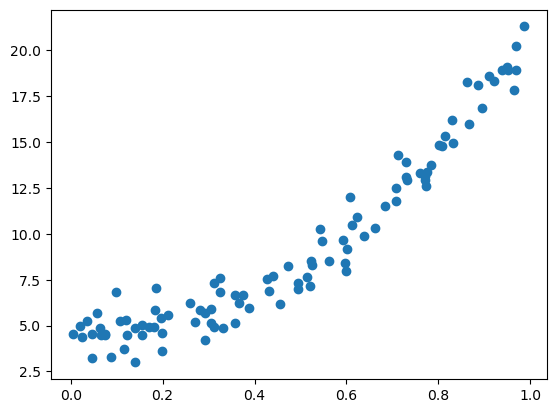

In [272]:
plt.scatter(X, y)

In [273]:
print("Testing for repo")

Testing for repo
